In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [3]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final project/train.csv', sep= ';')
train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


In [4]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final project/test.csv', sep= ';')
test.head()

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,1,Skoda Rapid 1.6 MPI AT Elegance,2016,11000,Petrol,Dealer,Automatic,First Owner,14.3 kmpl,1598 CC,103.5 bhp,153Nm@ 3800rpm,5.0
1,2,Honda City i VTEC V,2017,35000,Petrol,Individual,Manual,First Owner,17.8 kmpl,1497 CC,117.3 bhp,145Nm@ 4600rpm,5.0
2,3,Hyundai Xcent 1.2 Kappa SX Option,2014,80000,Petrol,Individual,Manual,First Owner,19.1 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
3,4,Mahindra Scorpio 2009-2014 SLE 7S BSIII,2014,145241,Diesel,Individual,Manual,First Owner,12.05 kmpl,2179 CC,120 bhp,290Nm@ 1800-2800rpm,7.0
4,5,Ford Ecosport 1.5 Diesel Titanium,2015,92651,Diesel,Dealer,Manual,First Owner,21.7 kmpl,1498 CC,98.96 bhp,215Nm@ 1750-2500rpm,5.0


In [5]:
#train.drop(5537,inplace=True)

In [6]:
print('Shape of train data',train.shape)
print('Shape of test data',test.shape)

Shape of train data (6000, 13)
Shape of test data (2128, 13)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6000 non-null   object 
 1   year           6000 non-null   int64  
 2   selling_price  6000 non-null   int64  
 3   km_driven      6000 non-null   int64  
 4   fuel           6000 non-null   object 
 5   seller_type    6000 non-null   object 
 6   transmission   6000 non-null   object 
 7   owner          6000 non-null   object 
 8   mileage        5841 non-null   object 
 9   engine         5841 non-null   object 
 10  max_power      5846 non-null   object 
 11  torque         5840 non-null   object 
 12  seats          5841 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 609.5+ KB


## **VISUALIZATION**

**Year**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


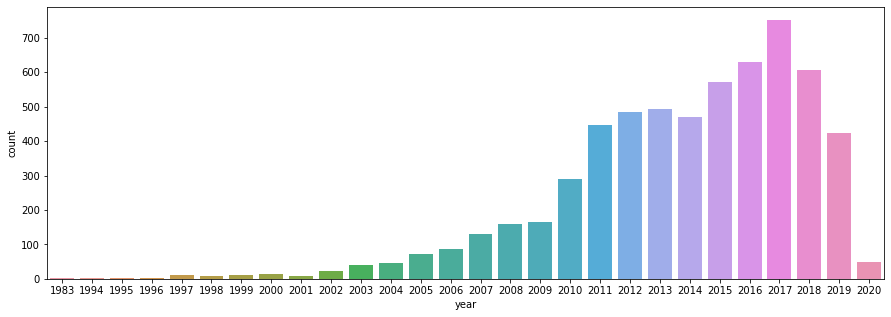

In [8]:
plt.rcParams['figure.figsize'] = (15,5)
sns.countplot(train['year'])

#fig,axis1 = plt.subplots( figsize = (15,5))
#sns.countplot(x = 'year', data = train, ax = axis1)

**Selling price vs Year**

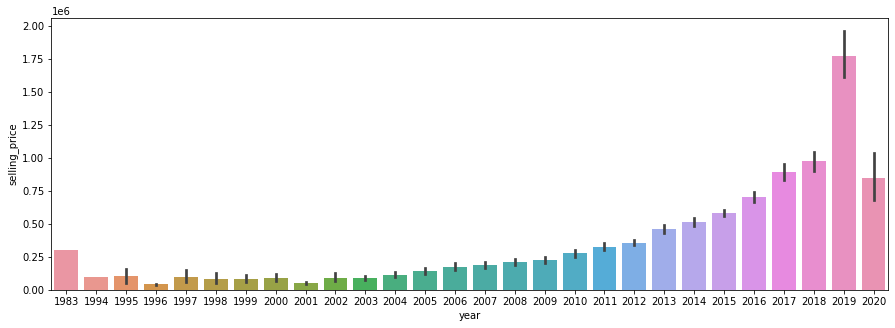

In [9]:
fig = plt.subplots(figsize = (15,5))
sns.barplot(x = 'year', y = 'selling_price', data = train)

**Selling price vs Fuel type**

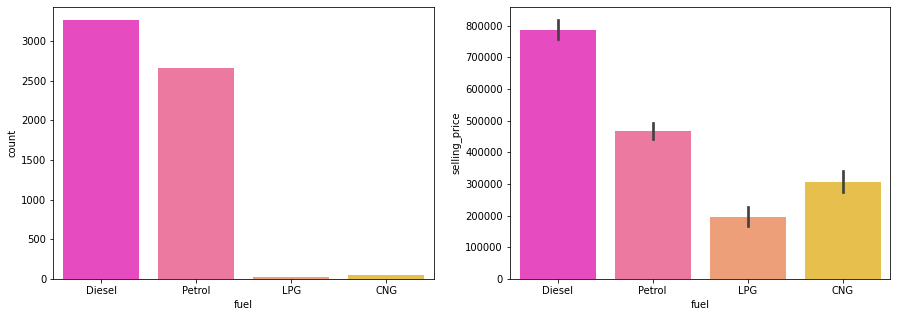

In [10]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (15,5))
sns.countplot(x = 'fuel', data = train, ax = axis1, palette='spring')
sns.barplot(x = 'fuel', y = 'selling_price', data = train, ax = axis2, palette='spring')

**Selling price vs Transmission type**

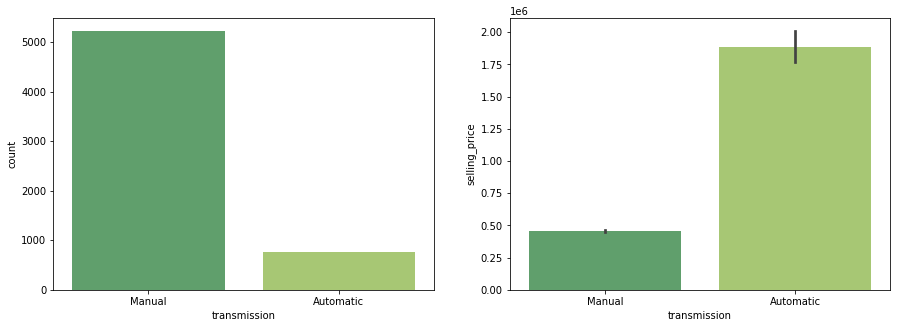

In [11]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (15,5))
sns.countplot(x = 'transmission', data = train, ax = axis1,palette='summer')
sns.barplot(x = 'transmission', y = 'selling_price', data = train, ax = axis2, palette='summer')

**Selling price vs Seller type**

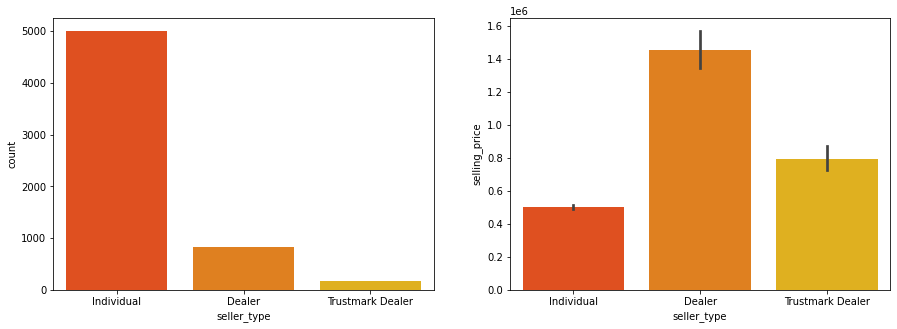

In [12]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (15,5))
sns.countplot(x = 'seller_type', data = train, ax = axis1, palette='autumn')
sns.barplot(x = 'seller_type', y = 'selling_price', data = train, ax = axis2, palette='autumn')

**Owner**

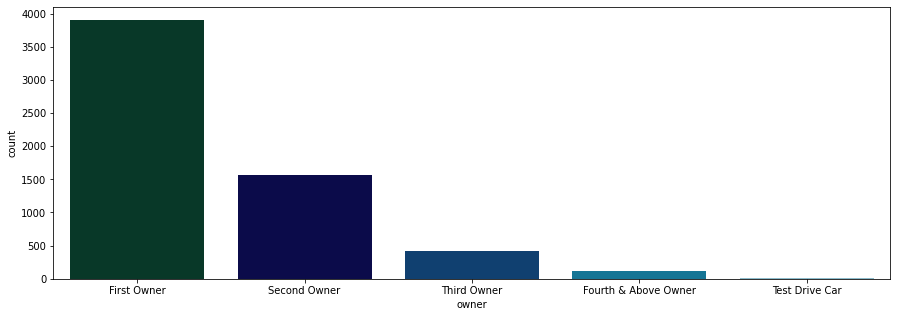

In [13]:
fig, axis1 = plt.subplots(figsize = (15,5))
sns.countplot(x = 'owner', data = train, ax = axis1, palette='ocean')

**A number of seats**

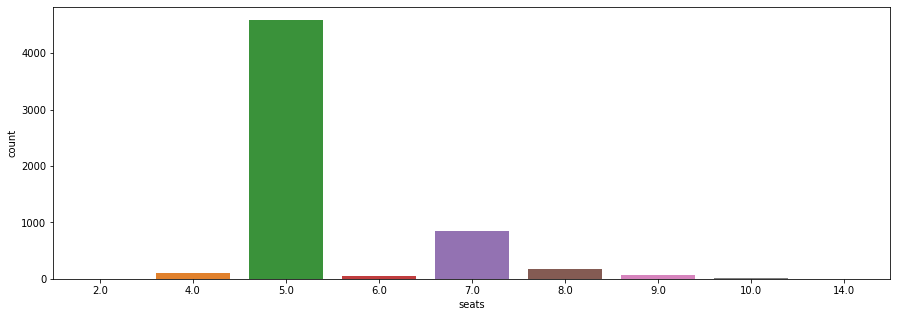

In [14]:
fig,axis1 = plt.subplots( figsize = (15,5))
sns.countplot(x = 'seats', data = train, ax = axis1)

## **DATA PROCESSING (TRAINING DATA)**

**Processing the columns 'mileage', 'engine', 'max_power'** 

In [15]:
train['mileage'] = train['mileage'].str.strip('kmpl').str.strip('km/kg')
train['engine'] = train['engine'].str.strip('CC')
train['max_power'] = train['max_power'].str.strip('bhp').str.strip()

**Converting the data type**

In [16]:
train['mileage'] = pd.to_numeric(train['mileage'])
train['engine'] = pd.to_numeric(train['engine'])
train['max_power'] = pd.to_numeric(train['max_power'])

**Checking for missing value**

In [17]:
train.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          159
engine           159
max_power        155
torque           160
seats            159
dtype: int64

**Removing the missing values**

In [18]:
#train.dropna(inplace=True)
train.fillna(train.mode().iloc[0], inplace=True)

**Encoding data**

In [19]:
train['fuel'].value_counts()

Diesel    3265
Petrol    2664
CNG         44
LPG         27
Name: fuel, dtype: int64

In [20]:
train['transmission'].value_counts()

Manual       5228
Automatic     772
Name: transmission, dtype: int64

In [21]:
train['seller_type'].value_counts()

Individual          5006
Dealer               820
Trustmark Dealer     174
Name: seller_type, dtype: int64

In [22]:
train['owner'].value_counts()

First Owner             3904
Second Owner            1558
Third Owner              414
Fourth & Above Owner     119
Test Drive Car             5
Name: owner, dtype: int64

In [23]:
# Encode data
train['fuel']= train['fuel'].replace({'Diesel': 0, 'Petrol': 1, 'CNG': 2, 'LPG': 3})

train['transmission']= train['transmission'].replace({'Manual': 0, 'Automatic': 1})

train['seller_type']= train['seller_type'].replace({'Individual': 0, 'Dealer': 1, 'Trustmark Dealer': 2})

train['owner'] = train['owner'].replace({'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5})

**Train data after processing**

In [24]:
train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,0,0,0,1,21.50,1497.0,108.50,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,0,0,0,1,21.19,1396.0,88.76,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,0,0,1,2,12.55,2982.0,168.50,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,1,0,0,1,17.01,1591.0,121.30,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,0,0,1,1,18.00,1969.0,190.00,400Nm,5.0


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6000 non-null   object 
 1   year           6000 non-null   int64  
 2   selling_price  6000 non-null   int64  
 3   km_driven      6000 non-null   int64  
 4   fuel           6000 non-null   int64  
 5   seller_type    6000 non-null   int64  
 6   transmission   6000 non-null   int64  
 7   owner          6000 non-null   int64  
 8   mileage        6000 non-null   float64
 9   engine         6000 non-null   float64
 10  max_power      6000 non-null   float64
 11  torque         6000 non-null   object 
 12  seats          6000 non-null   float64
dtypes: float64(4), int64(7), object(2)
memory usage: 609.5+ KB


In [26]:
correlation = train.corr()
correlation

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
year,1.000000,0.411998,-0.447794,-0.057363,0.235291,0.239208,-0.509930,0.322164,0.024215,0.224701,0.001524
selling_price,0.411998,1.000000,-0.241764,-0.200592,0.322844,0.592859,-0.217004,-0.111330,0.453692,0.746084,0.042521
km_driven,-0.447794,-0.241764,1.000000,-0.273456,-0.215945,-0.214129,0.292744,-0.203563,0.238740,-0.029057,0.256316
fuel,-0.057363,-0.200592,-0.273456,1.000000,0.047016,0.003218,0.004908,-0.031147,-0.489723,-0.304113,-0.335316
seller_type,0.235291,0.322844,-0.215945,0.047016,1.000000,0.360586,-0.196795,-0.015801,0.111070,0.234055,-0.078303
transmission,0.239208,0.592859,-0.214129,0.003218,0.360586,1.000000,-0.139015,-0.169960,0.284030,0.541507,-0.064292
owner,-0.509930,-0.217004,0.292744,0.004908,-0.196795,-0.139015,1.000000,-0.177594,-0.000898,-0.107529,0.015759
mileage,0.322164,-0.111330,-0.203563,-0.031147,-0.015801,-0.169960,-0.177594,1.000000,-0.578261,-0.363532,-0.464048
engine,0.024215,0.453692,0.238740,-0.489723,0.111070,0.284030,-0.000898,-0.578261,1.000000,0.702249,0.616736
max_power,0.224701,0.746084,-0.029057,-0.304113,0.234055,0.541507,-0.107529,-0.363532,0.702249,1.000000,0.196823


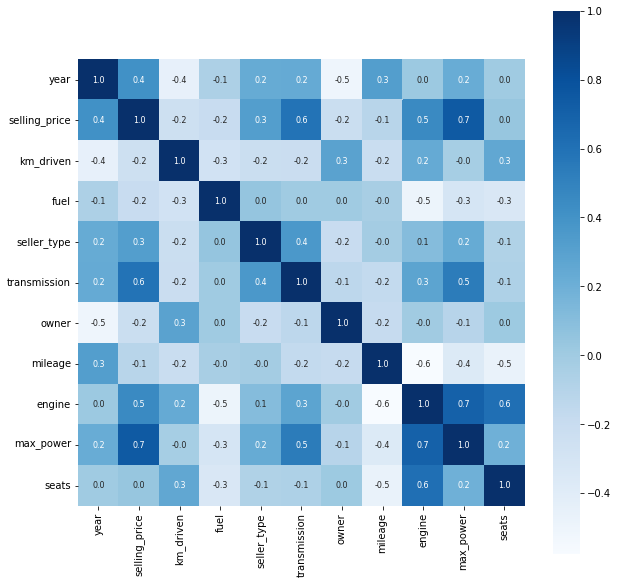

In [27]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')

## **DATA PROCESSING (TESTING DATA)**

In [28]:
test['mileage'] = test['mileage'].str.strip('kmpl').str.strip('km/kg')
test['engine'] = test['engine'].str.strip('CC')
test['max_power'] = test['max_power'].str.strip('bhp').str.strip()

In [29]:
test['mileage'] = pd.to_numeric(test['mileage'])
test['engine'] = pd.to_numeric(test['engine'])
test['max_power'] = pd.to_numeric(test['max_power'])

In [30]:
test.duplicated().any()

False

In [31]:
test.isnull().sum()

Id               0
name             0
year             0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage         62
engine          62
max_power       61
torque          62
seats           62
dtype: int64

In [32]:
test.fillna(test.mode().iloc[0], inplace=True)

In [33]:
test['fuel'].value_counts()

Diesel    1137
Petrol     967
CNG         13
LPG         11
Name: fuel, dtype: int64

In [34]:
test['transmission'].value_counts()

Manual       1850
Automatic     278
Name: transmission, dtype: int64

In [35]:
test['seller_type'].value_counts()

Individual          1760
Dealer               306
Trustmark Dealer      62
Name: seller_type, dtype: int64

In [36]:
test['owner'].value_counts()

First Owner             1385
Second Owner             547
Third Owner              141
Fourth & Above Owner      55
Name: owner, dtype: int64

In [37]:
test['fuel']= test['fuel'].replace({'Diesel': 0, 'Petrol': 1, 'CNG': 2, 'LPG': 3})

test['transmission']= test['transmission'].replace({'Manual': 0, 'Automatic': 1})

test['seller_type']= test['seller_type'].replace({'Individual': 0, 'Dealer': 1, 'Trustmark Dealer': 2})

test['owner'] = test['owner'].replace({'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5})

**Data after processing**

In [38]:
test.head()

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,1,Skoda Rapid 1.6 MPI AT Elegance,2016,11000,1,1,1,1,14.30,1598.0,103.50,153Nm@ 3800rpm,5.0
1,2,Honda City i VTEC V,2017,35000,1,0,0,1,17.80,1497.0,117.30,145Nm@ 4600rpm,5.0
2,3,Hyundai Xcent 1.2 Kappa SX Option,2014,80000,1,0,0,1,19.10,1197.0,82.00,114Nm@ 4000rpm,5.0
3,4,Mahindra Scorpio 2009-2014 SLE 7S BSIII,2014,145241,0,0,0,1,12.05,2179.0,120.00,290Nm@ 1800-2800rpm,7.0
4,5,Ford Ecosport 1.5 Diesel Titanium,2015,92651,0,1,0,1,21.70,1498.0,98.96,215Nm@ 1750-2500rpm,5.0


In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2128 non-null   int64  
 1   name          2128 non-null   object 
 2   year          2128 non-null   int64  
 3   km_driven     2128 non-null   int64  
 4   fuel          2128 non-null   int64  
 5   seller_type   2128 non-null   int64  
 6   transmission  2128 non-null   int64  
 7   owner         2128 non-null   int64  
 8   mileage       2128 non-null   float64
 9   engine        2128 non-null   float64
 10  max_power     2128 non-null   float64
 11  torque        2128 non-null   object 
 12  seats         2128 non-null   float64
dtypes: float64(4), int64(7), object(2)
memory usage: 216.2+ KB


## **SPLITTING DATA**

In [40]:
train.drop(["name","torque"],axis=1, inplace = True)
test.drop(["name","torque"],axis=1, inplace = True)

In [41]:
col_object= [column for column in train.columns if train[column].dtype == 'O']
col_object

[]

In [42]:
train.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2018,850000,9500,0,0,0,1,21.50,1497.0,108.50,5.0
1,2018,750000,30000,0,0,0,1,21.19,1396.0,88.76,5.0
2,2015,1500000,80000,0,0,1,2,12.55,2982.0,168.50,7.0
3,2015,795000,35000,1,0,0,1,17.01,1591.0,121.30,5.0
4,2019,3800000,20000,0,0,1,1,18.00,1969.0,190.00,5.0


In [43]:
test.head()

,Id,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2016,11000,1,1,1,1,14.30,1598.0,103.50,5.0
1,2,2017,35000,1,0,0,1,17.80,1497.0,117.30,5.0
2,3,2014,80000,1,0,0,1,19.10,1197.0,82.00,5.0
3,4,2014,145241,0,0,0,1,12.05,2179.0,120.00,7.0
4,5,2015,92651,0,1,0,1,21.70,1498.0,98.96,5.0


In [44]:
print(train.shape)
print(test.shape)

(6000, 11)
(2128, 11)


In [45]:
X= train.drop(['selling_price'],axis=1)
y= train['selling_price']
X= X.values
y= y.values

In [46]:
X_test= test.drop(['Id'],axis=1)
y_test= test['Id']
X_test= X_test.values
y_test= y_test.values

In [47]:
sc= StandardScaler()
X_scale= sc.fit_transform(X)
X_test= sc.transform(X_test)

In [48]:
X_train,X_val,y_train,y_val= train_test_split(X_scale,y,test_size=0.1,random_state=0, shuffle= True)

## **MODEL**

**Linear Regression**

In [49]:
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression()

In [50]:
pred_lr = linear_reg.predict(X_val)

In [51]:
#print('RMSE:',mean_squared_error(y_val, pred_lr, squared=False))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, pred_lr)))

RMSE: 452035.45462395414


**Random Forest Regression**

In [52]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [53]:
pred_rf = rf_reg.predict(X_val)

In [54]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, pred_rf)))

RMSE: 110116.13102254334


In [55]:
prediction1 = rf_reg.predict(X_test)
prediction1

array([645000.  , 857010.  , 401634.98, ..., 223099.82, 984599.98,
       343559.97])

In [56]:
result_rf= pd.DataFrame({'Id': test['Id'],'Predicted': prediction1})
result_rf.head()

,Id,Predicted
0,1,645000.00
1,2,857010.00
2,3,401634.98
3,4,559159.99
4,5,578742.49


In [57]:
#result_rf.to_csv("result_rf.csv",index=False)

**XGBRegressor**

In [58]:
#xgb_reg = XGBRegressor()

xgb_reg = XGBRegressor(learning_rate=0.1,max_depth=5,n_estimators=360, objective='reg:squarederror')  #1 

#xgb_reg = XGBRegressor(gamma=0,learning_rate=0.1,max_depth=5,n_estimators=100,n_jobs=16,objective='reg:squarederror',subsample=0.8,scale_pos_weight=0,reg_alpha=0, reg_lambda=1)  #2
#xgb_reg = XGBRegressor(gamma=0,learning_rate=0.1,max_depth=5,n_estimators=1000, #3     #1000: tính đc 137xxx(1)   #giảm learning rate= 0.05: tính đc 138xxx  (3)    
#                       n_jobs=16,objective='reg:squarederror',subsample=0.8,           #400:tính đc 139xxx(2)
#                     scale_pos_weight=0,reg_alpha=0, reg_lambda=1) #3

#xgb_reg = XGBRegressor(learning_rate=0.1,max_depth=5,n_estimators=360, n_jobs=16, objective='reg:squarederror',subsample=0.8,scale_pos_weight=0,reg_alpha=0)  #xgb_017

In [59]:
xgb_reg.fit(X_train,y_train)

XGBRegressor(max_depth=5, n_estimators=360, objective='reg:squarederror')

In [60]:
para = {'learning_rate': [0.15], 
     'max_depth': [8], 
     'n_estimators': [1500], 
     'num_leaves': [27], 
     'reg_alpha': [0.01], 
     'reg_lambda': [0]}

xgb_grid = GridSearchCV( cv=5,
    estimator=xgb_reg,verbose=2,
    param_grid={'n_estimators': range(50,200, 10),
                'max_features': ['auto'],
                'min_samples_leaf': range(1,3,1),
                'min_samples_split': range(2,10,1)},
    return_train_score=True)
xgb_grid.fit(X_train,y_train)
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

In [61]:
#xgb_grid = GridSearchCV(xgb_reg,para,cv = 2,verbose=True)
#xgb_grid.fit(X_train,y_train)

In [62]:
#pred_xgb = xgb_grid.predict(X_val)
pred_xgb = xgb_reg.predict(X_val)

In [63]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, pred_xgb)))

RMSE: 110132.18373968694


In [64]:
#xgb_grid.score(X_val, y_val)
xgb_reg.score(X_val, y_val)

0.9799717119950813

In [65]:
#prediction0 = xgb_grid.predict(X_test)
prediction0 = xgb_reg.predict(X_test)
prediction0

array([ 648997.5 ,  822968.9 ,  397500.78, ...,  164479.75, 1033075.7 ,
        358692.56], dtype=float32)

In [66]:
result_xgb= pd.DataFrame({'Id': test['Id'],'Predicted': prediction0})
result_xgb.head()

,Id,Predicted
0,1,648997.50000
1,2,822968.87500
2,3,397500.78125
3,4,567637.37500
4,5,599080.93750


In [67]:
result_xgb.to_csv("result_xgb_017.csv",index=False)

In [68]:
result_xgb.shape

(2128, 2)

**Extra Trees Regression**

In [69]:
from sklearn.ensemble import ExtraTreesRegressor
#et_reg = ExtraTreesRegressor(n_estimators=105, random_state=0) #th2: n_estimators= 107
#et_reg = ExtraTreesRegressor(n_estimators=100, max_features=0.2, random_state=0) #th1:360 (tính đc 152xxx)
et_reg = ExtraTreesRegressor(n_estimators=100, max_features= 0.2, random_state=0, min_samples_leaf=1, min_samples_split=2) #tính được 150xxx
et_reg.fit(X_train,y_train)
pred_et = et_reg.predict(X_val)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, pred_et)))

RMSE: 111041.40224881284


In [70]:
#pred_et = et_reg.predict(X_val)

In [71]:
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, pred_et)))

In [72]:
et_reg.score(X_val, y_val)

0.9796396517729051

In [73]:
prediction_et= et_reg.predict(X_test)
prediction_et

array([645000.  , 858910.  , 410719.94, ..., 158339.91, 945290.  ,
       340000.  ])

In [74]:
result_et= pd.DataFrame({'Id': test['Id'],'Predicted': prediction_et})
result_et.head()

,Id,Predicted
0,1,645000.00
1,2,858910.00
2,3,410719.94
3,4,545670.00
4,5,567849.98


In [75]:
result_et.to_csv("result_et014.csv",index=False)

**LGBM Regressor**

In [76]:
import lightgbm as ltb
ltb_reg = ltb.LGBMRegressor(num_leaves=85,n_estimators=120) #ltb21
ltb_reg.fit(X_train, y_train)
pred_ltb = ltb_reg.predict(X_val)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, pred_ltb)))

RMSE: 104359.21531053475


In [77]:
ltb_reg.score(X_val, y_val)

0.9820163874850275

In [78]:
#pred_ltb = ltb_reg.predict(X_val)

In [79]:
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, pred_ltb)))

In [80]:
prediction2 = ltb_reg.predict(X_test)
prediction2

array([ 643580.17523857,  842060.05809191,  412526.71944372, ...,
        179739.61139871, 1033674.21846424,  354456.56026233])

In [81]:
result_ltb=pd.DataFrame({"Id":y_test,"Predicted":prediction2})
result_ltb.head()

,Id,Predicted
0,1,643580.175239
1,2,842060.058092
2,3,412526.719444
3,4,554968.574207
4,5,601420.946260


In [82]:
result_ltb.to_csv("result_ltb21.csv",index=False)